**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [28]:
# Write your code here
import numpy as np
from types import SimpleNamespace
from scipy.optimize import fsolve
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

Part of the project has been made with the help from openAI chatgpt.
Sections where chatgpt has been made the dominant part of the code has been marked.

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [29]:
# Define parameters
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [30]:
# Define the linspaces for p1 and p2
p_1 = np.linspace(0.1 , 2.0 , 10)
p_2 = np.linspace(0.1 , 2.0 , 10)

# Set w as numeraire
w = 1

# Define the functions in the model setup
# Firm setup
def opt_labor(w,p):
    return ((p*par.A*par.gamma)/w)**(1/(1-par.gamma))

def opt_output(w,p):
    return par.A*(opt_labor(w,p))**par.gamma

def production(p,w,l):
    y = par.A * l
    return p*y - w*l

def profit(w,p):
    return (1-par.gamma)/par.gamma * w * ((p*par.A*par.gamma)/w)**(1/(1-par.gamma))

# Household setup
def opt_c1(l,w,p1,p2):
    return par.alpha * (w*l + par.T + profit(w,p1) + profit(w,p2)) / p1
    
def opt_c2(l,w,p1,p2):
    return (1-par.alpha) * (w*l + par.T + profit(w,p1) + profit(w,p2)) / (p2+par.tau)

def utility(l,w,p1,p2):
    c1 = opt_c1(l,w,p1,p2)
    c2 = opt_c2(l,w,p1,p2)
    return np.log(c1**par.alpha * c2**(1-par.alpha)) - par.nu * (l**(1+par.epsilon))/(1+par.epsilon)


# Optimal labor supply is found by maximixing utility
def optimal_labor(l):
    return - utility(l,w,p1,p2)

for p1 in p_1:
    for p2 in p_2:
        l1 = opt_labor(w,p1)
        l2 = opt_labor(w,p2)

        l = l1 + l2

        c1_opt = opt_c1(l,w,p1,p2)
        c2_opt = opt_c2(l,w,p1,p2)

        opt_y1 = opt_output(w,p1)
        opt_y2 = opt_output(w,p2)

print(l1,l2,l, c1_opt, c2_opt, opt_y1, opt_y2)


1.0 1.0 2.0 0.6 1.4 1.0 1.0


In [31]:
for p1 in p_1:
    for p2 in p_2:
        initial_guess = 0.1  
        res = optimize.minimize(optimal_labor, initial_guess, bounds=[(0, None)])
        opt_l = res.x
        c1_opt = opt_c1(opt_l,w,p1,p2)
        c2_opt = opt_c2(opt_l,w,p1,p2)
        opt_l1 = opt_labor(w,p1)
        opt_l2 = opt_labor(w,p2)
        opt_y1 = opt_output(w,p1)
        opt_y2 = opt_output(w,p2)
print(opt_l1,opt_l2,opt_l, opt_y1, opt_y2, c1_opt, c2_opt)

1.0 1.0 [0.61803401] 1.0 1.0 [0.3927051] [0.9163119]


In [32]:
def market_clearing(p):
    l = optimal_labor(l)

    eps1 = l - (l1+l2)
    eps2 = c1 - y1
    eps3 = c2 - y2

    return eps1 , eps2 , eps3

In [33]:
# Check market clearing
def market_clearing(p1, p2, w):
    l1 = opt_labor(w, p1) 
    l2 = opt_labor(w, p2)  
    c_1 = opt_c1(l1, w, p1, p2)
    c_2 = opt_c2(l2, w, p1, p2)
    
    # Firm's supply
    y1 = opt_output(w, p1)  # Output of good 1
    y2 = opt_output(w, p2)  # Output of good 2
    
    # Excess demand
    eps1 = c_1 - y1
    eps2 = c_2 - y2
    
    return eps1, eps2


for p1 in p_1:
    for p2 in p_2:
        eps_1 , eps_2 = market_clearing(p1,p2,w)

print(eps_1,eps_2)

-0.55 0.04999999999999982


The optimal consumtion should in market clearing equal optimal output, which is not the case in this result

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [34]:
# Set initial guess for the optimal labor
initial_guess = 0.1

# Find optimal labor using the scipy optimizer
result = optimize.minimize(optimal_labor, initial_guess, bounds=[(0,None)])
new_labor = result.x

c1_opt_new = opt_c1(new_labor,w,p1,p2)
c2_opt_new = opt_c2(new_labor,w,p1,p2)

opt_l1 = opt_labor(w,p1)
opt_l2 = opt_labor(w,p2)

opt_y1 = opt_output(w,p1)
opt_y2 = opt_output(w,p2)

print(opt_l1,opt_l2,opt_l, opt_y1, opt_y2, c1_opt, c2_opt)



1.0 1.0 [0.61803401] 1.0 1.0 [0.3927051] [0.9163119]


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [35]:
# Set up the SWF
def swf(U):
    return utility(l,w,p1,p2) - par.kappa*opt_y2


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [36]:
# Define parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

# Set seed
np.random.seed(2024)

# Define epsilon
par.epsilon = np.random.normal(0,par.sigma, (par.J,par.K))

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [37]:
# Set up empty list for the results
expected = []
average = []

# Set up a for-loop
for j in range(par.J):
    exp_utility = par.v[j] + np.mean(par.epsilon[j])
    expected.append(exp_utility)

    avg_utility = np.mean(par.v[j] + par.epsilon[j])
    average.append(avg_utility)

    print(f'For career track {j+1}:')
    print(f'Expected utility is given by {expected[j]:.3f}')
    print(f'Average utility is given by {average[j]:.3f}')
    print()

For career track 1:
Expected utility is given by 1.015
Average utility is given by 1.015

For career track 2:
Expected utility is given by 2.006
Average utility is given by 2.006

For career track 3:
Expected utility is given by 3.003
Average utility is given by 3.003



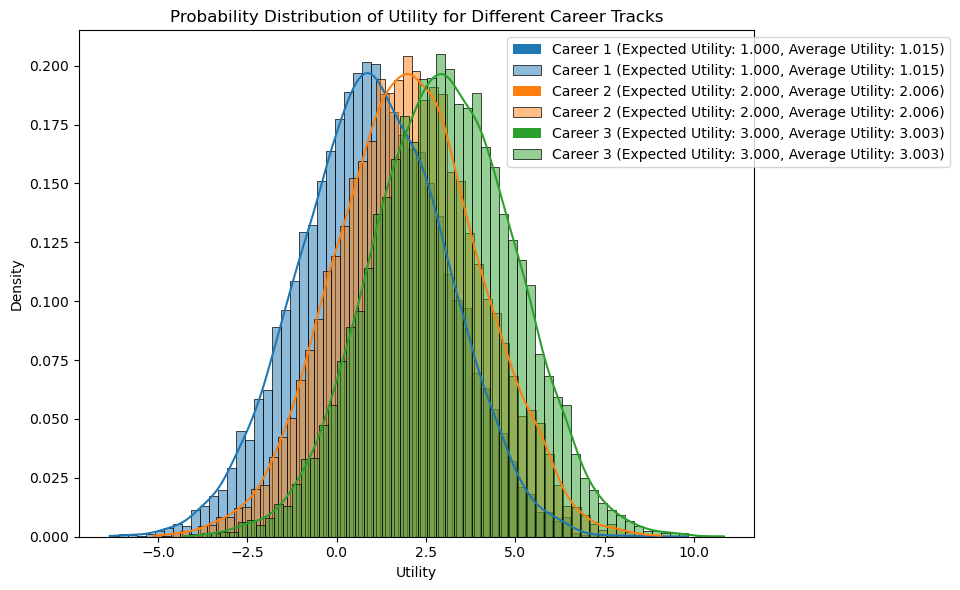

In [38]:
# This section of cade is made with the help from chatGPT
# Define expected utility 
u = par.v[:, np.newaxis] + par.epsilon  # Shape: (J, K)

# Calculate expected utility for each career track
expected_utilities = par.v

# Calculate average utility for each career track
average_utilities = np.mean(u, axis=1)

# Plotting
plt.figure(figsize=(10, 6))

# Plot histograms for each career track
for j in range(par.J):
    sns.histplot(u[j], kde=True, label=f'Career {j+1} (Expected Utility: {expected_utilities[j]:.3f}, Average Utility: {average_utilities[j]:.3f})', stat='density', linewidth=0.5)

plt.title('Probability Distribution of Utility for Different Career Tracks')
plt.xlabel('Utility')
plt.ylabel('Density')
plt.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.3,1.0))
plt.tight_layout()
plt.show()

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

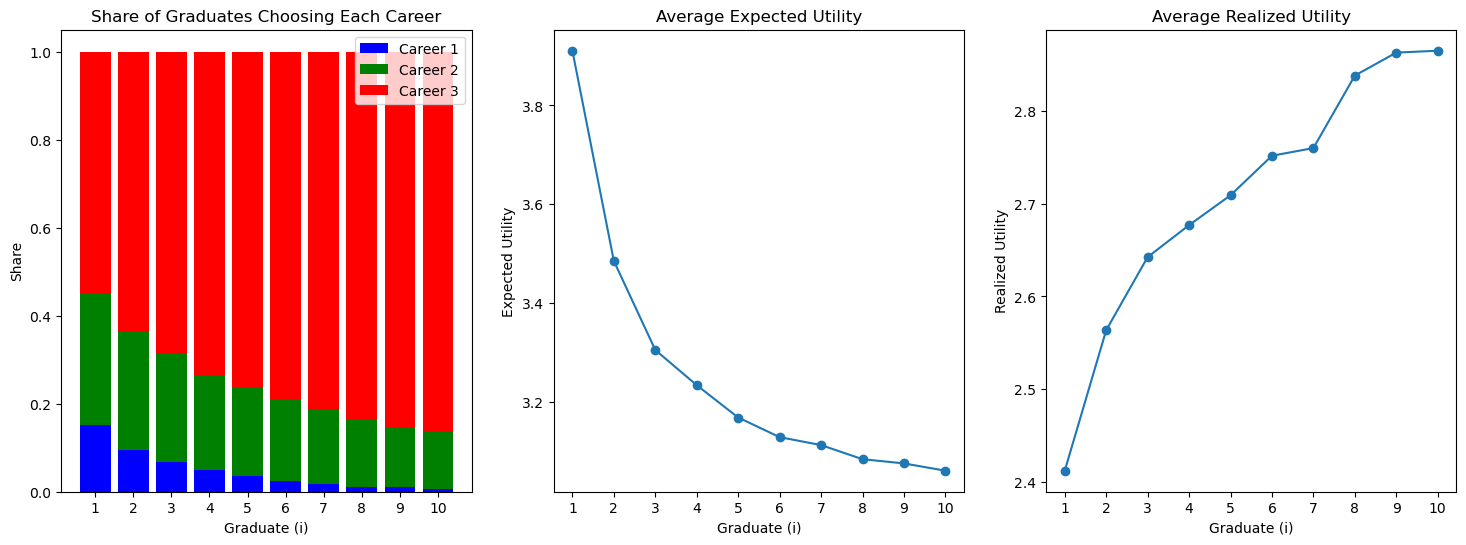

In [39]:
# Set up empty arrays for the results
grad_career = np.zeros((par.N, par.K), dtype=int)
expected_utility = np.zeros((par.N, par.K))
realized_utility = np.zeros((par.N, par.K))
career_share = np.zeros((par.N, par.J))

# Set random seed
np.random.seed(2024)

for i in range(par.N):
    F_i = i+1

    for k in range(par.K):

        # Define epsilon_friend
        epsilon_friend = np.random.normal(0, par.sigma, (par.J,F_i))

        # Define new utility
        new_utility = par.v + np.mean(epsilon_friend , axis=1)

        # Define epsilon_graduate 
        epsilon_graduate = np.random.normal(0,par.sigma, (par.J))

        # Determine career for each graduate
        career = np.argmax(new_utility)
        grad_career[i , k] = career

        # Determine expected utility
        expected_utility[i,k] = new_utility[career]

        # Determine realized utility
        realized_utility[i,k] = par.v[career] + epsilon_graduate[career]


for i in range(par.N):
    for j in range(par.J):
        career_share[i,j] = np.mean(grad_career[i,:]==j)


# Calculate average expected utility for each graduate
average_expected_utility = np.mean(expected_utility, axis=1)

# Calculate average realized utility for each graduate
average_realized_utility = np.mean(realized_utility, axis=1)


# Plot the result
plt.figure(figsize=(18, 6))

# Plot career shares
plt.subplot(1, 3, 1)
bottom = np.zeros(par.N)
colors = ['b', 'g', 'r']
for j in range(par.J):
    plt.bar(range(1, par.N + 1), career_share[:, j], bottom=bottom, color=colors[j], label=f'Career {j+1}')
    bottom += career_share[:, j]
plt.title('Share of Graduates Choosing Each Career')
plt.xlabel('Graduate (i)')
plt.ylabel('Share')
plt.xticks(range(1, par.N + 1)) 
plt.legend()

# Plot average expected utility
plt.subplot(1, 3, 2)
plt.plot(range(1, par.N + 1), average_expected_utility, marker='o')
plt.title('Average Expected Utility')
plt.xlabel('Graduate (i)')
plt.ylabel('Expected Utility')
plt.xticks(range(1, par.N + 1)) 

# Plot average realized utility
plt.subplot(1, 3, 3)
plt.plot(range(1, par.N + 1), average_realized_utility, marker='o')
plt.title('Average Realized Utility')
plt.xlabel('Graduate (i)')
plt.ylabel('Realized Utility')
plt.xticks(range(1, par.N + 1)) 
plt.show()


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

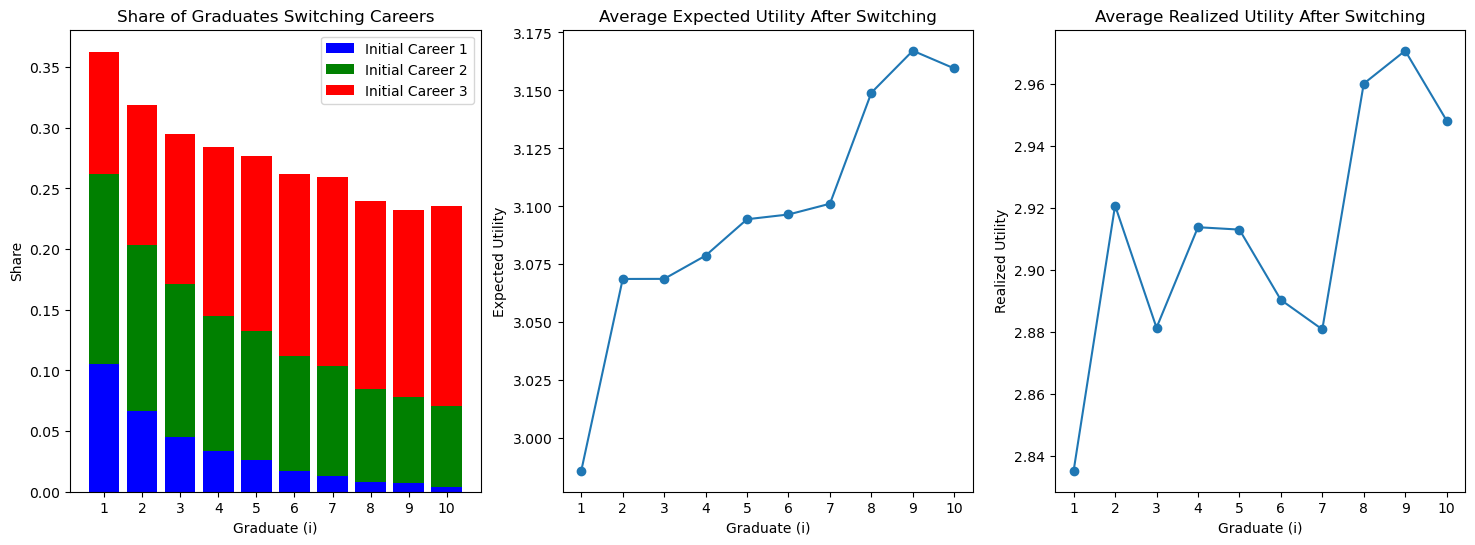

In [40]:
# Set c equal to 1
c = 1

# Set up empty arrays for the results
new_grad_career = np.zeros((par.N, par.K), dtype=int)
new_expected_utility = np.zeros((par.N, par.K))
new_realized_utility = np.zeros((par.N, par.K))
switch_decision = np.zeros((par.N, par.K), dtype=bool)

# Set up for-loop to calculate new optimal career
for i in range(par.N):
    F_i = i + 1  
    for k in range(par.K):
        initial_career = grad_career[i, k]
        initial_realized_utility = realized_utility[i, k]
        
        # Calculate new expected utility including cost of switching career
        new_exp_utility = par.v + np.mean(epsilon_friend, axis=1)
        new_exp_utility[initial_career] = initial_realized_utility
        
        for j in range(par.J):
            if j != initial_career:
                new_exp_utility[j] -= c
        
        # Find new career given the highest expected utility
        new_career = np.argmax(new_exp_utility)
        new_grad_career[i, k] = new_career
        
        # Graduate switching decision
        switch_decision[i, k] = (new_career != initial_career)
        
        new_expected_utility[i, k] = new_exp_utility[new_career]
        
        if new_career == initial_career:
            new_realized_utility[i, k] = initial_realized_utility
        else:
            new_realized_utility[i, k] = par.v[new_career] + np.random.normal(0, par.sigma) - c

# Find average expected utility for each graduate
average_new_expected_utility = np.mean(new_expected_utility, axis=1)

# Find average realized utility for each graduate
average_new_realized_utility = np.mean(new_realized_utility, axis=1)

# Share of graduates switching careers for each initial career choice
switch_shares = np.zeros((par.J, par.N))
for i in range(par.N):
    for j in range(par.J):
        switch_shares[j, i] = np.mean(switch_decision[i, :] & (grad_career[i, :] == j))

# Visualize results
plt.figure(figsize=(18, 6))

# Plot share of graduates switching careers as a stacked column diagram
plt.subplot(1, 3, 1)
bottom = np.zeros(par.N)
colors = ['b', 'g', 'r']
for j in range(par.J):
    plt.bar(range(1, par.N + 1), switch_shares[j, :], bottom=bottom, color=colors[j], label=f'Initial Career {j+1}')
    bottom += switch_shares[j, :]
plt.title('Share of Graduates Switching Careers')
plt.xlabel('Graduate (i)')
plt.ylabel('Share')
plt.xticks(range(1, par.N + 1))  # Set x-ticks to increase by 1 unit
plt.legend()

# Plot average new expected utility
plt.subplot(1, 3, 2)
plt.plot(range(1, par.N + 1), average_new_expected_utility, marker='o')
plt.title('Average Expected Utility After Switching')
plt.xlabel('Graduate (i)')
plt.ylabel('Expected Utility')
plt.xticks(range(1, par.N + 1))  # Set x-ticks to increase by 1 unit

# Plot average new realized utility
plt.subplot(1, 3, 3)
plt.plot(range(1, par.N + 1), average_new_realized_utility, marker='o')
plt.title('Average Realized Utility After Switching')
plt.xlabel('Graduate (i)')
plt.ylabel('Realized Utility')
plt.xticks(range(1, par.N + 1))  # Set x-ticks to increase by 1 unit

plt.show()

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [41]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

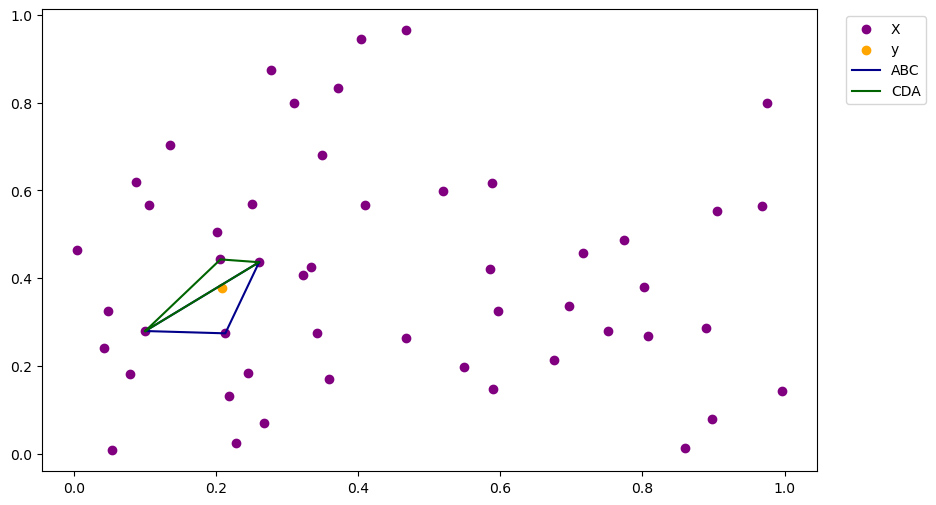

In [42]:
# Define minimizing function 
def min_dist(X,y,conditions):
    distance = cdist(X , np.array([y]))
    possible = np.where(conditions(X,y))[0]
    if len(possible) == 0:
        return None
    closest = np.argmin(distance[possible])
    return X[possible[closest]]

# Define conditions
def condition_A(X, y):
    return (X[:, 0] > y[0]) & (X[:, 1] > y[1])

def condition_B(X, y):
    return (X[:, 0] > y[0]) & (X[:, 1] < y[1])

def condition_C(X, y):
    return (X[:, 0] < y[0]) & (X[:, 1] < y[1])

def condition_D(X, y):
    return (X[:, 0] < y[0]) & (X[:, 1] > y[1])

# Determine points A, B, C and D
A = min_dist(X, y, condition_A)
B = min_dist(X, y, condition_B)
C = min_dist(X, y, condition_C)
D = min_dist(X, y, condition_D)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X[:,0] , X[:,1] , color='purple' , label='X')
plt.scatter(y[0] , y[1] , color='orange' , label='y')
plt.plot([A[0],B[0],C[0],A[0]] , [A[1],B[1],C[1],A[1]] , color='darkblue' , label='ABC')
plt.plot([C[0],D[0],A[0],C[0]] , [C[1],D[1],A[1],C[1]] , color='darkgreen' , label='CDA')
plt.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.15,1.0))
plt.show;

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [43]:
# Define the barycentric coordinates for triangle ABC
def bary_coor_ABC(y,A,B,C):
    if A is None or B is None or C is None:
        return None
    r1 = ((B[1]-C[1])*(y[0]-C[0]) + (C[0]-B[0])*(y[1]-C[1])) / (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r2 = ((C[1]-A[1])*(y[0]-C[0]) + (A[0]-C[0])*(y[1]-C[1])) / (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r3 = 1 - r1 - r2
    return [r1 , r2 , r3]

bary_ABC = bary_coor_ABC(y,A,B,C)


# Define the barycentric coordinates for triangle CDA
def bary_coor_CDA(y,C,D,A):
    if C is None or D is None or A is None:
        return None
    r1 = ((D[1]-A[1])*(y[0]-A[0]) + (A[0]-D[0])*(y[1]-A[1])) / (D[1] - A[1]) * (C[0] - A[0]) + (A[0] - D[0]) * (C[1] - A[1])
    r2 = ((A[1]-C[1])*(y[0]-A[0]) + (C[0]-A[0])*(y[1]-A[1])) / (D[1] - A[1]) * (C[0] - A[0]) + (A[0] - D[0]) * (C[1] - A[1])
    r3 = 1 - r1 - r2
    return [r1 , r2 , r3]

bary_CDA = bary_coor_CDA(y,C,D,A)


if bary_ABC is not None and all(0 <= r <= 1 for r in bary_ABC):
    print(f'Point y is inside triangle ABC with barycentric coordinates: {bary_ABC[0]:.3f} , {bary_ABC[1]:.3f} , {bary_ABC[2]:.3f}')
    triangle = 'ABC'
elif bary_CDA is not None and all(0 <= r <= 1 for r in bary_CDA):
    print(f'Point y is inside triangle CDA with barycentric coordinates: {bary_CDA[0]:.3f} , {bary_CDA[1]:.3f} , {bary_CDA[2]:.3f}')
    triangle = 'CDA'
else:
    print('Point y is not inside any triangle')



Point y is inside triangle ABC with barycentric coordinates: 0.336 , 0.021 , 0.643


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [44]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [45]:
# Define the approximation of f(y) using barycentric coordinates
def approximate_f(y, A, B, C, D, bary_ABC, bary_CDA, X, F):
    if bary_ABC is not None and all(0 <= r <= 1 for r in bary_ABC):
        f_A = f(A)
        f_B = f(B)
        f_C = f(C)
        return bary_ABC[0] * f_A + bary_ABC[1] * f_B + bary_ABC[2] * f_C
    elif bary_CDA is not None and all(0 <= r <= 1 for r in bary_CDA):
        f_C = f(C)
        f_D = f(D)
        f_A = f(A)
        return bary_CDA[0] * f_C + bary_CDA[1] * f_D + bary_CDA[2] * f_A
    else:
        return np.nan

approx_f_y = approximate_f(y, A, B, C, D, bary_ABC, bary_CDA, X, F)

# Determine the true value of f(y)
true_f_y = f(y)

# Print the results
print(f"The approximated f(y): {approx_f_y:.3f}")
print(f"The true f(y): {true_f_y:.3f}")

The approximated f(y): 0.058
The true f(y): 0.079


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [46]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [47]:
# Set up a for-loop and determine approximations and compare
for y in Y:
    # Find points A, B, C, D
    A = min_dist(X, y, condition_A)
    B = min_dist(X, y, condition_B)
    C = min_dist(X, y, condition_C)
    D = min_dist(X, y, condition_D)

    # Compute barycentric coordinates for triangles ABC and CDA
    bary_ABC = bary_coor_ABC(y, A, B, C)
    bary_CDA = bary_coor_CDA(y, C, D, A)

    # Compute the approximation of f(y)
    approx_f_y = approximate_f(y, A, B, C, D, bary_ABC, bary_CDA, X, F)

    # Compute the true value of f(y)
    true_f_y = f(y)

    # Print the results
    print(f"For the point y: {y}")
    print(f"The approximated f(y): {approx_f_y:.3f}")
    print(f"The true f(y): {true_f_y:.3f}")
    print()

For the point y: (0.2, 0.2)
The approximated f(y): nan
The true f(y): 0.040

For the point y: (0.8, 0.2)
The approximated f(y): 0.094
The true f(y): 0.160

For the point y: (0.8, 0.8)
The approximated f(y): nan
The true f(y): 0.640

For the point y: (0.8, 0.2)
The approximated f(y): 0.094
The true f(y): 0.160

For the point y: (0.5, 0.5)
The approximated f(y): nan
The true f(y): 0.250

